(70000, 784)
(70000,)

---------- TESTCASE 1 ----------
Saving figure some_digit_plot


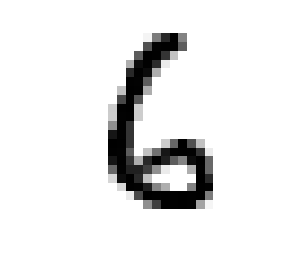

The number is :  6

---------- TESTCASE 2 ----------
Saving figure some_digit_plot_2


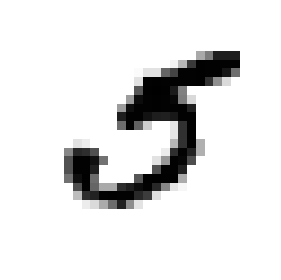

The number is :  5

Predicting for some_value_1 (6)
['Even']

Predicting for some_value_2 (5)
['Odd']


In [3]:
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os
%matplotlib inline

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
# CHAPTER_ID = "classification"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

def sort_by_target(mnist):
    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
    reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000] = mnist.target[reorder_train]
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000:] = mnist.target[reorder_test + 60000]
    
try:
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('mnist_784', version=1, cache=True)
    mnist.target = mnist.target.astype(np.int8) # fetch_openml() returns targets as strings
    sort_by_target(mnist) # fetch_openml() returns an unsorted dataset
except ImportError:
    from sklearn.datasets import fetch_mldata
    mnist = fetch_mldata('MNIST original')
mnist["data"], mnist["target"]

# print(mnist.data.shape)
# print(mnist.target.shape)

X, y = mnist["data"], mnist["target"]
print(X.shape)
print(y.shape)

some_digit = X[41000]
some_digit_image = some_digit.reshape(28, 28)
# plt.imshow(some_digit_image, cmap = mpl.cm.binary,
#            interpolation="nearest")
# plt.axis("off")
# save_fig("some_digit_plot")
# plt.show()

some_digit_2 = X[36000]
some_digit_image_2 = some_digit_2.reshape(28, 28)
# plt.imshow(some_digit_image_2, cmap = mpl.cm.binary,
#            interpolation="nearest")
# plt.axis("off")

# save_fig("some_digit_plot_2")
# plt.show()

import numpy
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

odd_even_train = []
odd_even_test = []

for i in range(len(y_train)):
    if y_train[i] % 2 == 0:
        odd_even_train.append("Even")
    else:
        odd_even_train.append("Odd")
        
for i in range(len(y_test)):
    if y_test[i] % 2 == 0:
        odd_even_test.append("Even")
    else:
        odd_even_test.append("Odd")
        
odd_even_train = numpy.array(odd_even_train)
odd_even_test = numpy.array(odd_even_test)
        
print("\n---------- TESTCASE 1 ----------")
plt.imshow(some_digit_image, cmap = mpl.cm.binary,
           interpolation="nearest")
plt.axis("off")
save_fig("some_digit_plot")
plt.show()
print("The number is : ",y_train[41000])        
print("\n---------- TESTCASE 2 ----------")
plt.imshow(some_digit_image_2, cmap = mpl.cm.binary,
           interpolation="nearest")
plt.axis("off")

save_fig("some_digit_plot_2")
plt.show()
print("The number is : ",y_train[36000])        

y_train = odd_even_train
y_test = odd_even_test

########################## BINARY CLASSIFIER ###########################

from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=5, tol=-np.infty, random_state=42)
# sgd_clf.fit(X_train, y_train_5)
sgd_clf.fit(X_train, y_train)

print("\nPredicting for some_value_1 (6)")
ans1 = sgd_clf.predict([some_digit])
print(ans1)

print("\nPredicting for some_value_2 (5)")
ans2 = sgd_clf.predict([some_digit_2])
print(ans2)